In [402]:
import sys
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read in all the files

In [403]:
radixTKMPIRandom = th.Thicket.from_caliperreader(glob('dataFiles/MPI/Radix/random/*.cali'))
radixTKMPISorted = th.Thicket.from_caliperreader(glob('dataFiles/MPI/Radix/sorted/*.cali'))
radixTKMPIReverse = th.Thicket.from_caliperreader(glob('dataFiles/MPI/Radix/reverse/*.cali'))
radixTKMPIPerturbed = th.Thicket.from_caliperreader(glob('dataFiles/MPI/Radix/perturbed/*.cali'))

radixTKCUDARandom = th.Thicket.from_caliperreader(glob('dataFiles/CUDA/Radix/random/*.cali'))
radixTKCUDASorted = th.Thicket.from_caliperreader(glob('dataFiles/CUDA/Radix/sorted/*.cali'))
radixTKCUDAReverse = th.Thicket.from_caliperreader(glob('dataFiles/CUDA/Radix/reverse/*.cali'))
radixTKCUDAPerturbed = th.Thicket.from_caliperreader(glob('dataFiles/CUDA/Radix/perturbed/*.cali'))


In [404]:
radixTKCUDAPerturbed.metadata

,cali.caliper.version,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:cuda.gputime,spot:node.order,spot:output,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_procs,num_threads,num_blocks,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,,
66094856,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,1024-268435456-3.cali,1701983562,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radix_cuda, 1024, 268435456, 3, 0]",g,radix,CUDA,int,4,268435456,1%perturbed,1024,1024,0,23,online
80841445,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,128-262144-3.cali,1701836369,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radix_cuda, 128, 262144, 3, 0]",g,radix,CUDA,int,4,262144,1%perturbed,128,128,0,23,online
280692109,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,1024-262144-3.cali,1701984183,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radix_cuda, 1024, 262144, 3, 0]",g,radix,CUDA,int,4,262144,1%perturbed,1024,1024,0,23,online
666657842,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,64-268435456-3.cali,1701836369,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radix_cuda, 64, 268435456, 3, 0]",g,radix,CUDA,int,4,268435456,1%perturbed,64,64,0,23,online
904004212,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,64-262144-3.cali,1701836275,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radix_cuda, 64, 262144, 3, 0]",g,radix,CUDA,int,4,262144,1%perturbed,64,64,0,23,online
980764703,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,512-67108864-3.cali,1701837774,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radix_cuda, 512, 67108864, 3, 0]",g,radix,CUDA,int,4,67108864,1%perturbed,512,512,0,23,online
1019963131,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,64-4194304-3.cali,1701836305,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radix_cuda, 64, 4194304, 3, 0]",g,radix,CUDA,int,4,4194304,1%perturbed,64,64,0,23,online
1045597242,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,64-16777216-3.cali,1701836335,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radix_cuda, 64, 16777216, 3, 0]",g,radix,CUDA,int,4,16777216,1%perturbed,64,64,0,23,online
1089216690,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,256-16777216-3.cali,1701837743,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./radix_cuda, 256, 16777216, 3, 0]",g,radix,CUDA,int,4,16777216,1%perturbed,256,256,0,23,online


Clean up the radix data

In [405]:
radixMPIData = [radixTKMPIRandom, radixTKMPISorted, radixTKMPIReverse, radixTKMPIPerturbed]
radixMPIDataClean = []

for i in range(len(radixMPIData)):
    radixGB = radixMPIData[i].groupby("InputSize")

    radixCtk = th.Thicket.concat_thickets(
        thickets=list(radixGB.values()),
        headers=list(radixGB.keys()),
        axis="columns",
        metadata_key="num_procs"
    )

    remove_list = [("node", "")]
    values = [2**16, 2**18, 2**20, 2**22, 2**24, 2**26, 2**28]
    for val in values:
        remove_list.append((val, "nid"))
        remove_list.append((val, "spot.channel"))
        remove_list.append((val, "Total time"))

    radixCtk.dataframe = radixCtk.dataframe.reset_index().drop(remove_list, axis=1)
    radixMPIDataClean.append(radixCtk)

radixCUDAData = [radixTKCUDARandom, radixTKCUDASorted, radixTKCUDAReverse, radixTKCUDAPerturbed]
radixCUDADataClean = []

for i in range(len(radixCUDAData)):
    radixGB = radixCUDAData[i].groupby("InputSize")

    radixCtk = th.Thicket.concat_thickets(
        thickets=list(radixGB.values()),
        headers=list(radixGB.keys()),
        axis="columns",
        metadata_key="num_procs"
    )

    remove_list = [("node", "")]
    values = [2**16, 2**18, 2**20, 2**22, 2**24, 2**26, 2**28]
    for val in values:
        remove_list.append((val, "nid"))
        remove_list.append((val, "spot.channel"))
        remove_list.append((val, "Total time"))

    radixCtk.dataframe = radixCtk.dataframe.reset_index().drop(remove_list, axis=1)
    radixCUDADataClean.append(radixCtk)

7  thickets created...
{65536: <thicket.thicket.Thicket object at 0x000001A9A8192410>, 262144: <thicket.thicket.Thicket object at 0x000001A9AE514090>, 1048576: <thicket.thicket.Thicket object at 0x000001A9AED962D0>, 4194304: <thicket.thicket.Thicket object at 0x000001A9AD08CF90>, 16777216: <thicket.thicket.Thicket object at 0x000001A9A82A55D0>, 67108864: <thicket.thicket.Thicket object at 0x000001A9ACC4D310>, 268435456: <thicket.thicket.Thicket object at 0x000001A9A7C25B10>}
7  thickets created...
{65536: <thicket.thicket.Thicket object at 0x000001A9ACAA23D0>, 262144: <thicket.thicket.Thicket object at 0x000001A9A808D890>, 1048576: <thicket.thicket.Thicket object at 0x000001A9A7EC8490>, 4194304: <thicket.thicket.Thicket object at 0x000001A9ACD0CE50>, 16777216: <thicket.thicket.Thicket object at 0x000001A9AE13C490>, 67108864: <thicket.thicket.Thicket object at 0x000001A9AAD098D0>, 268435456: <thicket.thicket.Thicket object at 0x000001A9AE595C50>}
7  thickets created...
{65536: <thicket.

Collect desired regions for plotting

In [406]:
algorithm = "Radix"

RANDOM = "Random"
SORTED = "Sorted"
REVERSE = "Reverse"
PERTURBED = "Perturbed"


In [407]:
allInputTypes = [RANDOM, SORTED, REVERSE, PERTURBED]


def collectMPIRegion(dataName, inputTypes=allInputTypes):
  res = {}
  indexes = []

  for input in inputTypes:
    indexes.append(allInputTypes.index(input))

  for count, i in enumerate(indexes):
    cleanData = radixMPIDataClean[i]
    val = cleanData.dataframe.loc[cleanData.dataframe['name'] == dataName]
    res[f"{algorithm}MPI{inputTypes[count]}"] = val
  
  return res

def collectCUDARegion(dataName, inputTypes=allInputTypes):
  res = {}
  indexes = []

  for input in inputTypes:
    indexes.append(allInputTypes.index(input))

  for count, i in enumerate(indexes):
    cleanData = radixCUDADataClean[i]
    val = cleanData.dataframe.loc[cleanData.dataframe['name'] == dataName]
    res[f"{algorithm}MPI{inputTypes[count]}"] = val

  return res


In [408]:
# Data for main
radixMPIRandomMain = radixMPIDataClean[0].dataframe.loc[radixMPIDataClean[0].dataframe['name'] == 'main']
radixMPISortedMain = radixMPIDataClean[1].dataframe.loc[radixMPIDataClean[1].dataframe['name'] == 'main']
radixMPIReverseMain = radixMPIDataClean[2].dataframe.loc[radixMPIDataClean[2].dataframe['name'] == 'main']
radixMPIPerturbedMain = radixMPIDataClean[3].dataframe.loc[ radixMPIDataClean[3].dataframe['name'] == 'main']

# Data for comm
radixMPIRandomComm = radixMPIDataClean[0].dataframe.loc[radixMPIDataClean[0].dataframe['name'] == 'comm']
radixMPISortedComm = radixMPIDataClean[1].dataframe.loc[radixMPIDataClean[1].dataframe['name'] == 'comm']
radixMPIReverseComm = radixMPIDataClean[2].dataframe.loc[radixMPIDataClean[2].dataframe['name'] == 'comm']
radixMPIPerturbedComm = radixMPIDataClean[3].dataframe.loc[ radixMPIDataClean[3].dataframe['name'] == 'comm']

# Data for comm_large
radixMPIRandomCommLarge = radixMPIDataClean[0].dataframe.loc[radixMPIDataClean[0].dataframe['name'] == 'comm_large']
radixMPISortedCommLarge = radixMPIDataClean[1].dataframe.loc[radixMPIDataClean[1].dataframe['name'] == 'comm_large']
radixMPIReverseCommLarge = radixMPIDataClean[2].dataframe.loc[radixMPIDataClean[2].dataframe['name'] == 'comm_large']
radixMPIPerturbedCommLarge = radixMPIDataClean[3].dataframe.loc[ radixMPIDataClean[3].dataframe['name'] == 'comm_large']

# Data for comp
radixMPIRandomComp = radixMPIDataClean[0].dataframe.loc[radixMPIDataClean[0].dataframe['name'] == 'comp_large']
radixMPISortedComp = radixMPIDataClean[1].dataframe.loc[radixMPIDataClean[1].dataframe['name'] == 'comp_large']
radixMPIReverseComp = radixMPIDataClean[2].dataframe.loc[radixMPIDataClean[2].dataframe['name'] == 'comp_large']
radixMPIPerturbedComp = radixMPIDataClean[3].dataframe.loc[radixMPIDataClean[3].dataframe['name'] == 'comp_large']

# data for correctness check
radixMPIRandomCorrect = radixMPIDataClean[0].dataframe.loc[radixMPIDataClean[0].dataframe['name'] == 'correctness_check']
radixMPISortedCorrect = radixMPIDataClean[1].dataframe.loc[radixMPIDataClean[1].dataframe['name'] == 'correctness_check']
radixMPIReverseCorrect = radixMPIDataClean[2].dataframe.loc[radixMPIDataClean[2].dataframe['name'] == 'correctness_check']
radixMPIPerturbedCorrect = radixMPIDataClean[3].dataframe.loc[radixMPIDataClean[3].dataframe['name'] == 'correctness_check']

algosMain = {'RadixMPIRandom': radixMPIRandomMain, 'RadixMPISorted': radixMPISortedMain, 'RadixMPIReverse': radixMPIReverseMain,
            'RadixMPIPerturbed': radixMPIPerturbedMain}

algosComm = {'RadixMPIRandom': radixMPIRandomComm, 'RadixMPISorted': radixMPISortedComm, 'RadixMPIReverse': radixMPIReverseComm,
            'RadixMPIPerturbed': radixMPIPerturbedComm}

algosCommLarge = {'RadixMPIRandom': radixMPIRandomCommLarge, 'RadixMPISorted': radixMPISortedCommLarge, 'RadixMPIReverse': radixMPIReverseCommLarge,
            'RadixMPIPerturbed': radixMPIPerturbedCommLarge}

algosComp = {'RadixMPIRandom': radixMPIRandomComp, 'RadixMPISorted': radixMPISortedComp, 'RadixMPIReverse': radixMPIReverseComp,
            'RadixMPIPerturbed': radixMPIPerturbedComp}

algosCorrect = {'RadixMPIRandom': radixMPIRandomCorrect, 'RadixMPISorted': radixMPISortedCorrect, 'RadixMPIReverse': radixMPIReverseCorrect,
            'RadixMPIPerturbed': radixMPIPerturbedCorrect}

# Data for main
radixCUDARandomMain = radixCUDADataClean[0].dataframe.loc[radixCUDADataClean[0].dataframe['name'] == 'main']
radixCUDASortedMain = radixCUDADataClean[1].dataframe.loc[radixCUDADataClean[1].dataframe['name'] == 'main']
radixCUDAReverseMain = radixCUDADataClean[2].dataframe.loc[radixCUDADataClean[2].dataframe['name'] == 'main']
radixCUDAPerturbedMain = radixCUDADataClean[3].dataframe.loc[radixCUDADataClean[3].dataframe['name'] == 'main']

# Data for comm
radixCUDARandomComm = radixCUDADataClean[0].dataframe.loc[radixCUDADataClean[0].dataframe['name'] == 'comm']
radixCUDASortedComm = radixCUDADataClean[1].dataframe.loc[radixCUDADataClean[1].dataframe['name'] == 'comm']
radixCUDAReverseComm = radixCUDADataClean[2].dataframe.loc[radixCUDADataClean[2].dataframe['name'] == 'comm']
radixCUDAPerturbedComm = radixCUDADataClean[3].dataframe.loc[radixCUDADataClean[3].dataframe['name'] == 'comm']

# Data for comp
radixCUDARandomComp = radixCUDADataClean[0].dataframe.loc[radixCUDADataClean[0].dataframe['name'] == 'comp_large']
radixCUDASortedComp = radixCUDADataClean[1].dataframe.loc[radixCUDADataClean[1].dataframe['name'] == 'comp_large']
radixCUDAReverseComp = radixCUDADataClean[2].dataframe.loc[radixCUDADataClean[2].dataframe['name'] == 'comp_large']
radixCUDAPerturbedComp = radixCUDADataClean[3].dataframe.loc[radixCUDADataClean[3].dataframe['name'] == 'comp_large']



algosMainCUDA = {'RadixCUDARandom': radixCUDARandomMain, 'RadixCUDASorted': radixCUDASortedMain, 'RadixCUDAReverse': radixCUDAReverseMain,
            'RadixCUDAPerturbed': radixCUDAPerturbedMain}

algosCommCUDA = {'RadixCUDARandom': radixCUDARandomComm, 'RadixCUDASorted': radixCUDASortedComm, 'RadixCUDAReverse': radixCUDAReverseComm,
            'RadixCUDAPerturbed': radixCUDAPerturbedComm}

algosCompCUDA = {'RadixCUDARandom': radixCUDARandomComp, 'RadixCUDASorted': radixCUDASortedComp, 'RadixCUDAReverse': radixCUDAReverseComp,
            'RadixCUDAPerturbed': radixCUDAPerturbedComp}

display(radixCUDADataClean[0].dataframe)

num_procs         65536                                                \
             Min time/rank Max time/rank Avg time/rank Avg GPU time/rank   
0         64      0.492005      0.492005      0.492005          0.000747   
1        128      0.369536      0.369536      0.369536          0.000749   
2        256      0.347054      0.347054      0.347054          0.000844   
3        512      0.357124      0.357124      0.357124          0.001055   
4       1024      0.355170      0.355170      0.355170          0.001131   
5         64      0.000556      0.000556      0.000556          0.000053   
6        128      0.000555      0.000555      0.000555          0.000053   
7        256      0.000526      0.000526      0.000526          0.000054   
8        512      0.000504      0.000504      0.000504          0.000056   
9       1024      0.000496      0.000496      0.000496          0.000056   
10        64      0.000482      0.000482      0.000482          0.000053   
11       128      0.000477      0.000477      0.000477          0.000053   
12       256      0.000450      0.000450      0.000450          0.000054   
13       512      0.000431      0.000431      0.000431          0.000056   
14      1024      0.000425      0.000425      0.000425          0.000056   
15        64      0.000433      0.000433      0.000433          0.000053   
16       128      0.000426      0.000426      0.000426          0.000053   
17       256      0.000400      0.000400      0.000400          0.000054   
18       512      0.000387      0.000387      0.000387          0.000056   
19      1024      0.000379      0.000379      0.000379          0.000056   
20        64      0.001474      0.001474      0.001474          0.000694   
21       128      0.001489      0.001489      0.001489          0.000696   
22       256      0.001553      0.001553      0.001553          0.000789   
23       512      0.001765      0.001765      0.001765          0.000999   
24      1024      0.001843      0.001843      0.001843          0.001076   
25        64      0.001451      0.001451      0.001451          0.000694   
26       128      0.001467      0.001467      0.001467          0.000696   
27       256      0.001532      0.001532      0.001532          0.000789   
28       512      0.001747      0.001747      0.001747          0.000999   
29      1024      0.001826      0.001826      0.001826          0.001076   
30        64      0.000218      0.000218      0.000218               NaN   
31       128      0.000219      0.000219      0.000219               NaN   
32       256      0.000217      0.000217      0.000217               NaN   
33       512      0.000196      0.000196      0.000196               NaN   
34      1024      0.000198      0.000198      0.000198               NaN   
35        64      0.001605      0.001605      0.001605               NaN   
36       128      0.001600      0.001600      0.001600               NaN   
37       256      0.001405      0.001405      0.001405               NaN   
38       512      0.001396      0.001396      0.001396               NaN   
39      1024      0.001396      0.001396      0.001396               NaN   

                                                             262144  \
   Min GPU time/rank Max GPU time/rank Total GPU time Min time/rank   
0           0.000747          0.000747       0.000747      0.495174   
1           0.000749          0.000749       0.000749      0.347866   
2           0.000844          0.000844       0.000844      0.352293   
3           0.001055          0.001055       0.001055      0.361627   
4           0.001131          0.001131       0.001131      0.361012   
5           0.000053          0.000053       0.000053      0.001361   
6           0.000053          0.000053       0.000053      0.001380   
7           0.000054          0.000054       0.000054      0.001367   
8           0.000056          0.000056       0.000056      0.001390   
9           0.000056         

In [409]:
print(algosMain)
print(collectMPIRegion('main'))

{'RadixMPIRandom':   num_procs         65536                                                 \
            Min time/rank Max time/rank Avg time/rank Variance time/rank   
0         2      0.861699      0.861941      0.861820           0.000000   
1         4      0.395808      0.396891      0.396613           0.000000   
2         8      0.508426      0.512038      0.510854           0.000002   
3        16      0.773448      0.776115      0.775184           0.000001   
4        32      1.413696      1.419382      1.416892           0.000005   
5        64      1.373495      1.379980      1.377730           0.000005   
6       128      1.442573      1.456324      1.448743           0.000014   
7       256      2.008604      2.118308      2.045720           0.001061   

         262144                                                      1048576  \
  Min time/rank Max time/rank Avg time/rank Variance time/rank Min time/rank   
0      0.595849      0.596392      0.596120           0.0000

Plot strong scaling

In [410]:
def plot_strong_scaling(algos, num_vals, time_type, title, xlabel, ylabel, savedir=None):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    for k in algos.keys():
        dframe = algos[k]
        xvals = dframe['num_procs']
        yvals = dframe[num_vals][time_type]
        ax.plot(xvals, yvals, label=k)
    ax.legend()
    plt.xscale("log", base=2)
    plt.show()
    if savedir != None:
        plt.save(savedir)

In [432]:
def plot_strong_scaling_legend_input_size(algo, values, time_type, title, xlabel, ylabel, savedir=None):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    xvals = algo['num_procs']
    
    for val in values:
        yvals = list(algo[val][time_type])
        ax.plot(xvals, yvals, label=str(val))
    
    ax.legend()
    plt.xscale("log", base=2)
    plt.show()
    if savedir != None:
        plt.save(savedir)
      

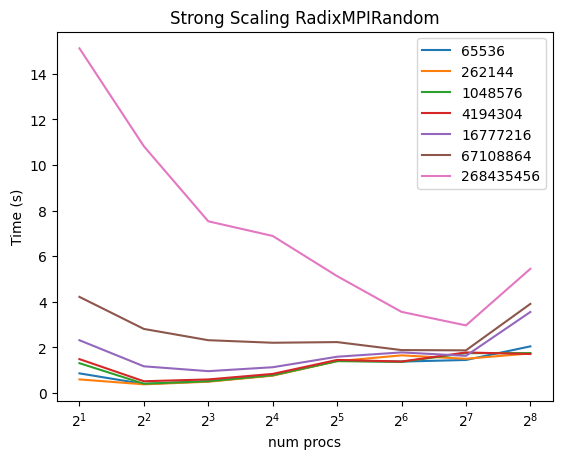

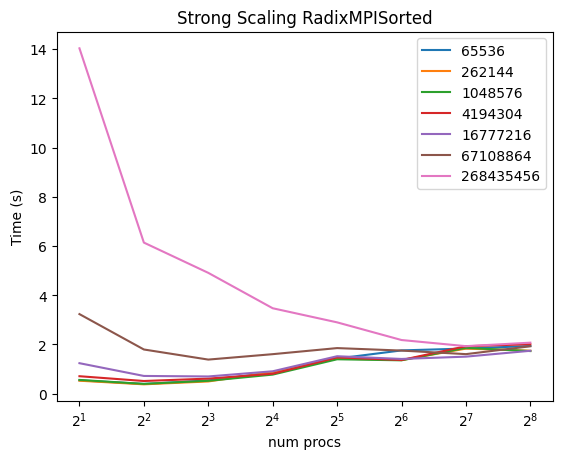

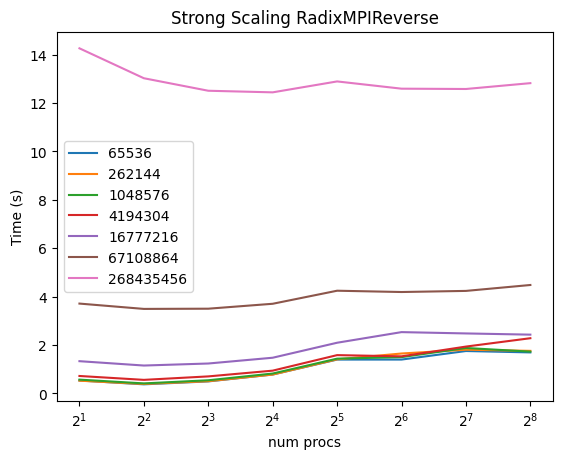

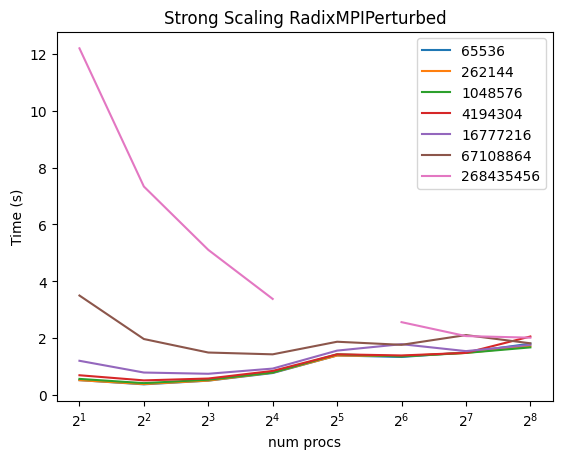

In [434]:
values = [2**16, 2**18, 2**20, 2**22, 2**24, 2**26, 2**28]

for key in algosMain.keys():
  plot_strong_scaling_legend_input_size(algosMain[key], values, 'Avg time/rank', f"Strong Scaling {key}", "num procs", "Time (s)")

MPI

['Random']


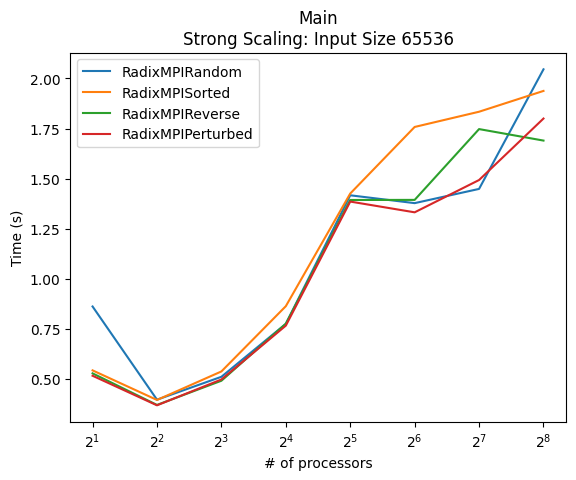

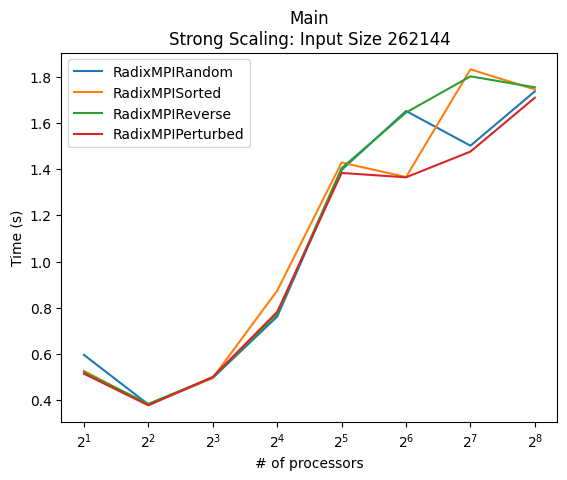

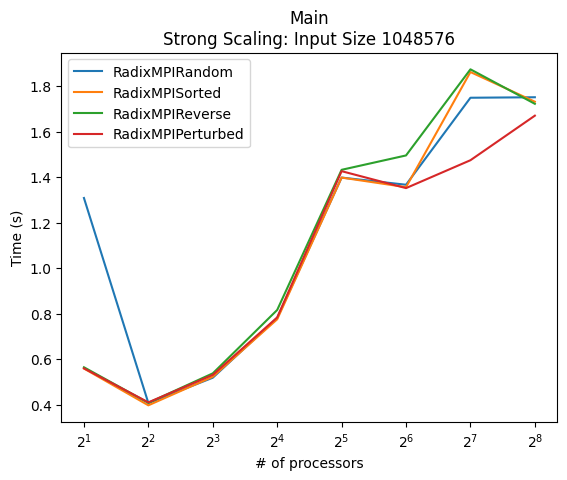

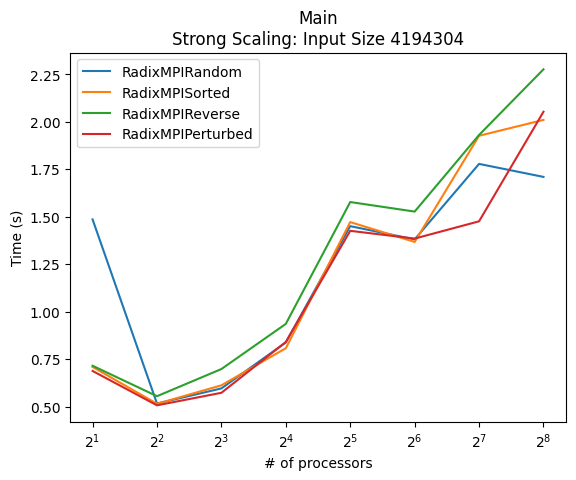

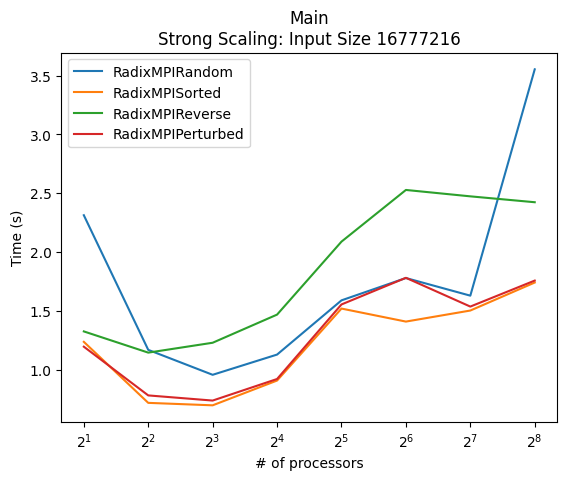

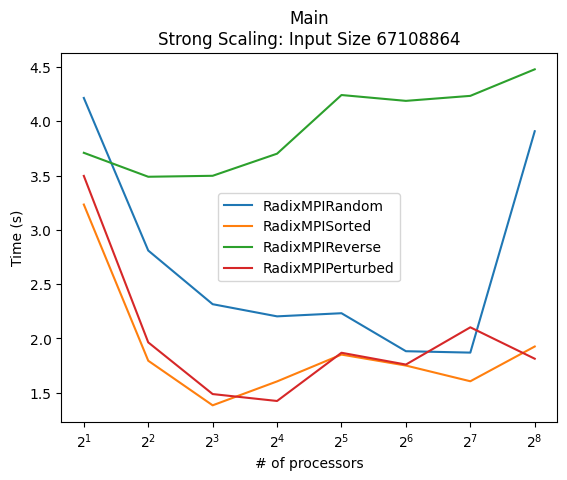

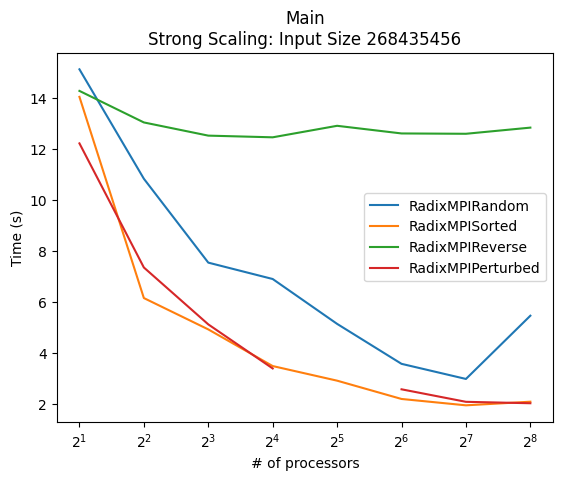

In [420]:
values = [2**16, 2**18, 2**20, 2**22, 2**24, 2**26, 2**28]
inputTypes = [RANDOM]

print(inputTypes)

for val in values:
    plot_strong_scaling(collectMPIRegion('main'), val, 'Avg time/rank', 'Main\nStrong Scaling: Input Size ' + str(val), '# of processors', 'Time (s)')
    # plot_strong_scaling(collectMPIRegion('comm'), val, 'Avg time/rank', 'Comm\nStrong Scaling: Input Size ' + str(val), '# of processors', 'Time (s)')
    # plot_strong_scaling(collectMPIRegion('comp'), val, 'Avg time/rank', 'Comp\nStrong Scaling: Input Size ' + str(val), '# of processors', 'Time (s)')
    #plot_strong_scaling(algosComp, val, 'Avg time/rank', 'Comp_Large\nStrong Scaling: Input Size ' + str(val), '# of processors', 'Time (s)')
    # plot_strong_scaling(algosCorrect, val, 'Avg time/rank', 'Correctness_Check\nStrong Scaling: Input Size ' + str(val), '# of processors', 'Time (s)')

CUDA

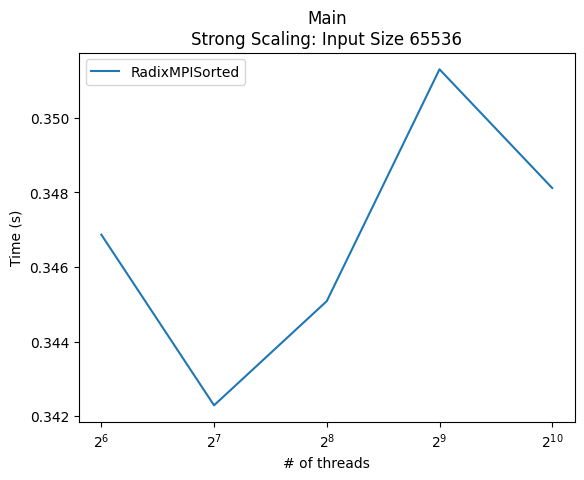

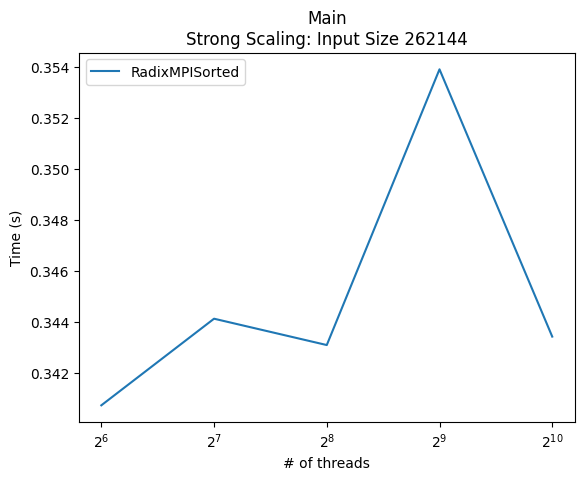

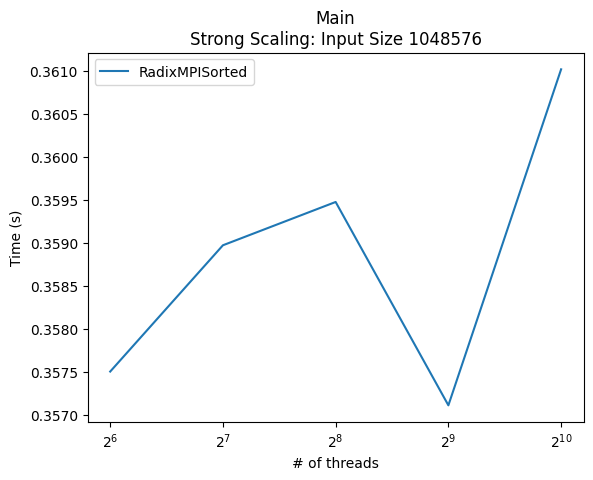

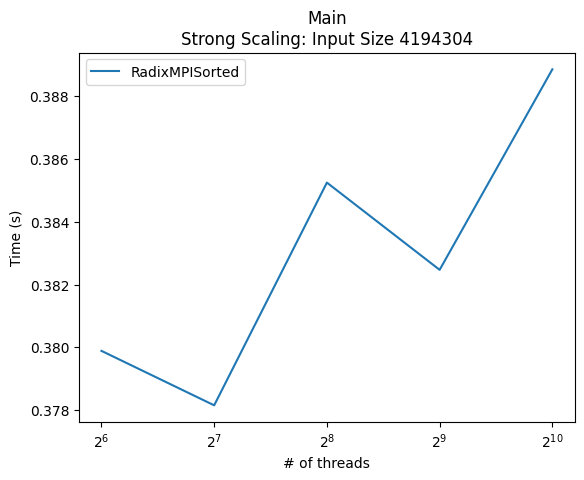

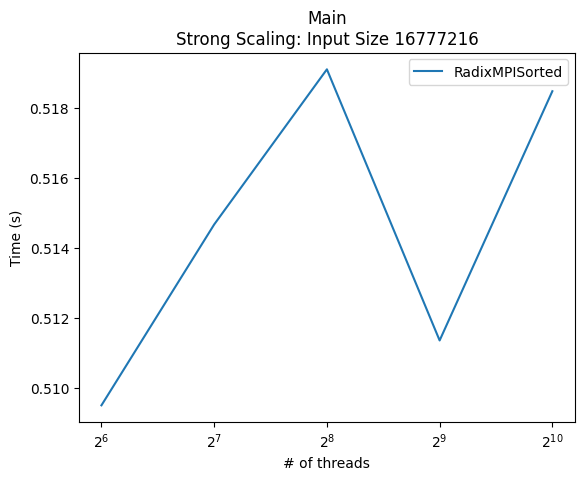

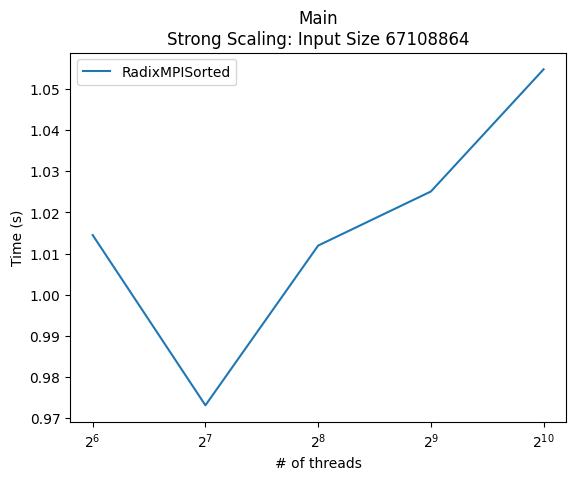

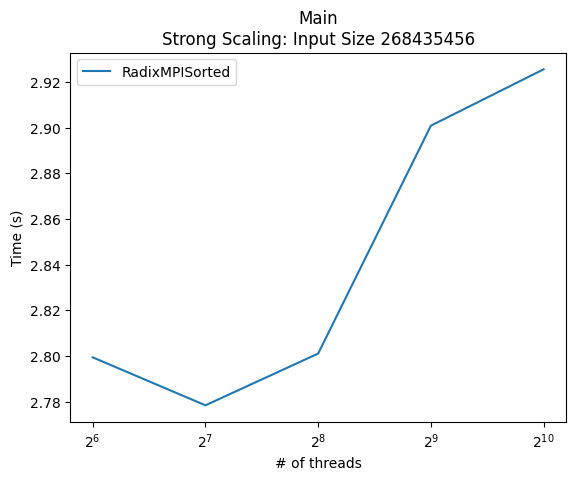

In [414]:
for val in values:
    plot_strong_scaling(collectCUDARegion('main', [SORTED]), val, 'Avg time/rank', 'Main\nStrong Scaling: Input Size ' + str(val), '# of threads', 'Time (s)')
    # plot_strong_scaling(collectCUDARegion('comm'), val, 'Avg time/rank', 'Comm\nStrong Scaling: Input Size ' + str(val), '# of threads', 'Time (s)')
    #plot_strong_scaling(collectCUDARegion('comp'), val, 'Avg time/rank', 'Comp_Large\nStrong Scaling: Input Size ' + str(val), '# of threads', 'Time (s)')

Plot strong scaling speedup

In [415]:
def plot_strong_scaling_speedup(algoname, algo, values, time_type, title, xlabel, ylabel, savedir=None):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    xvals = algo['num_procs']
    
    for val in values:
        vals_list = list(algo[val][time_type])
        yvals = [vals_list[0] / currVal for currVal in vals_list]
        ax.plot(xvals, yvals, label=str(val))
    
    ax.legend()
    plt.xscale("log", base=2)
    plt.show()
    if savedir != None:
        plt.save(savedir)

MPI

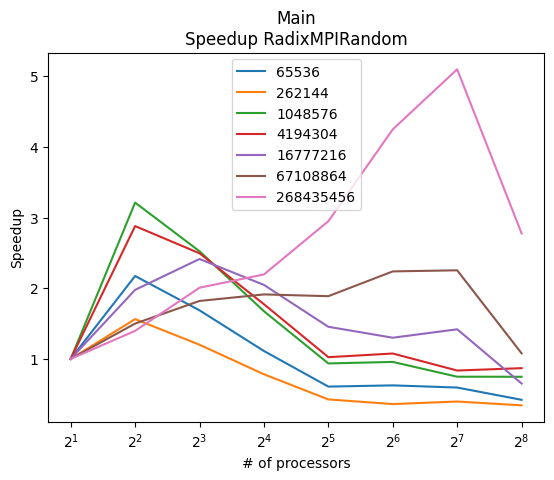

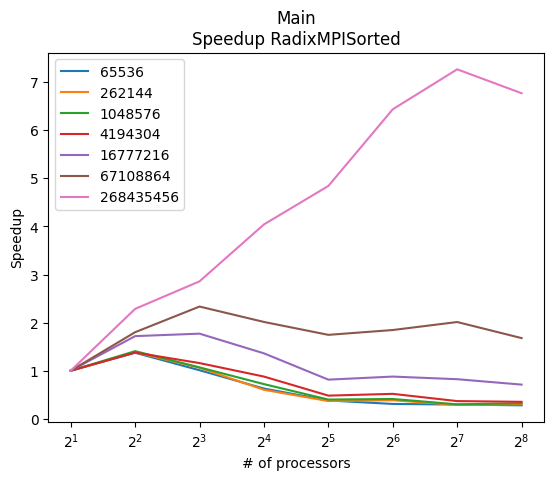

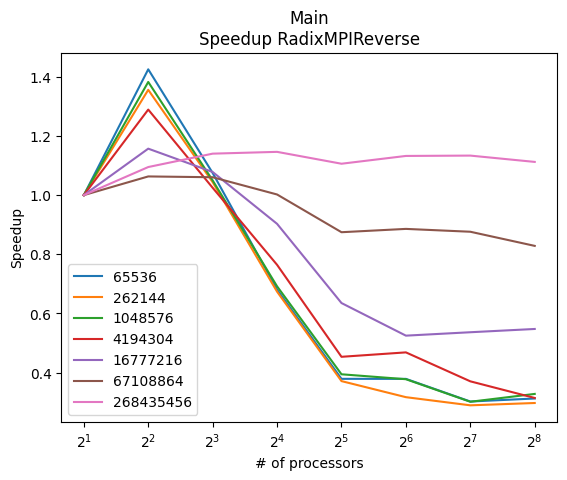

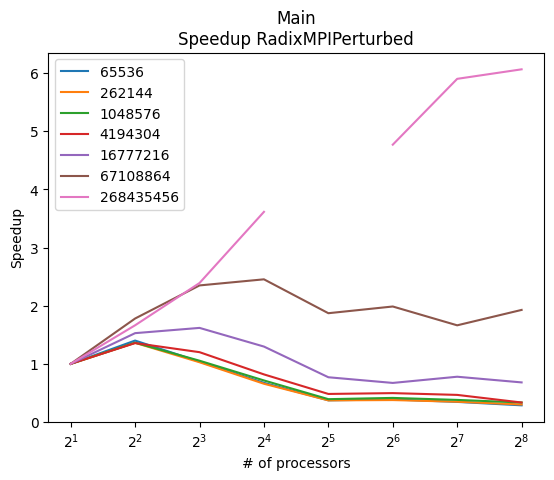

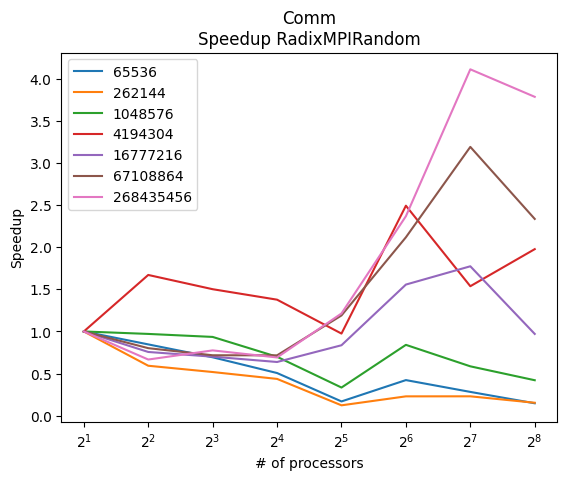

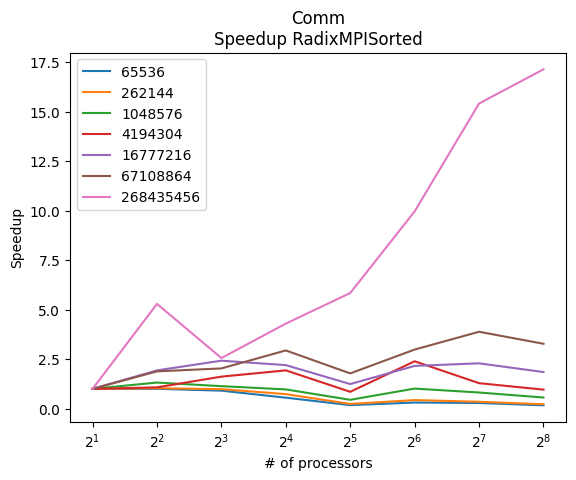

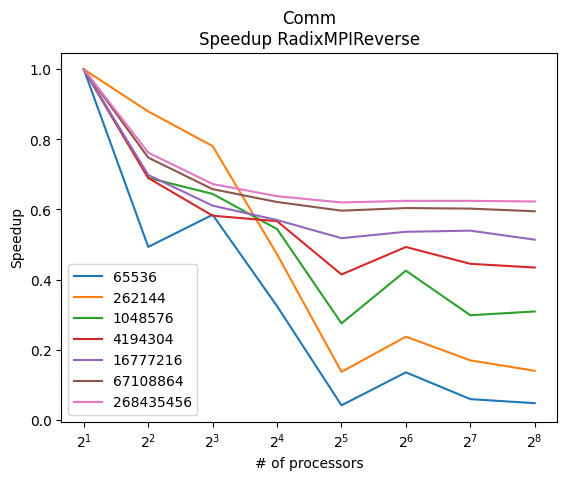

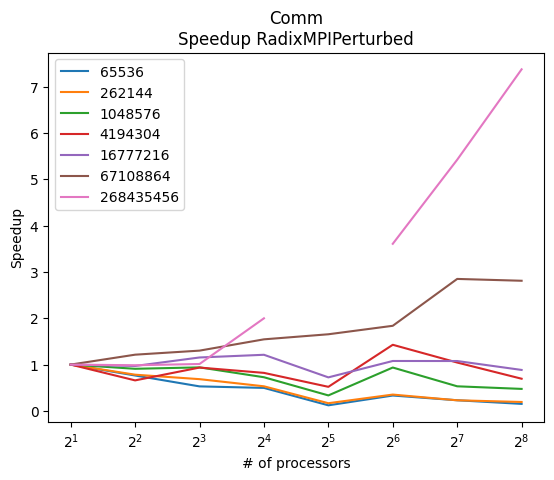

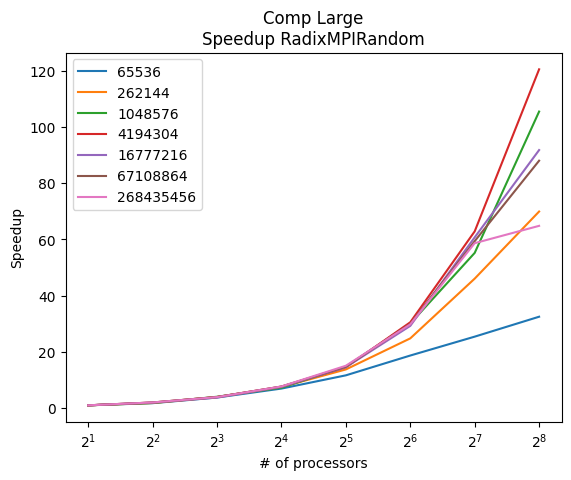

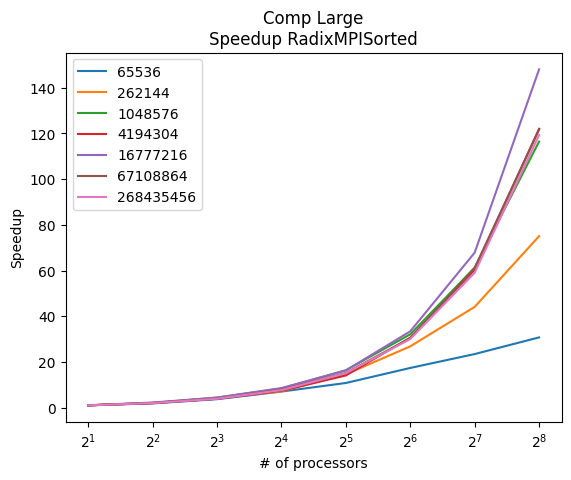

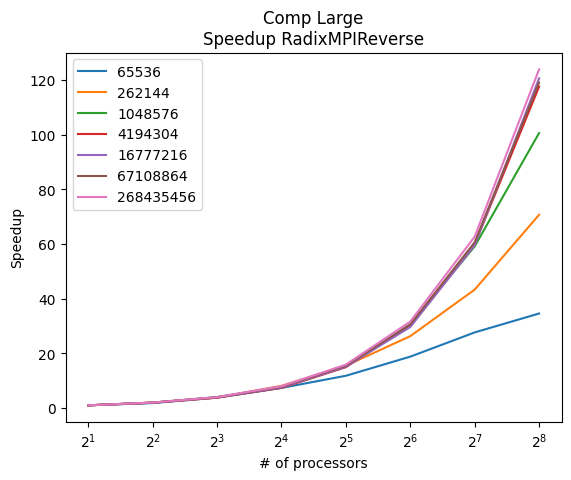

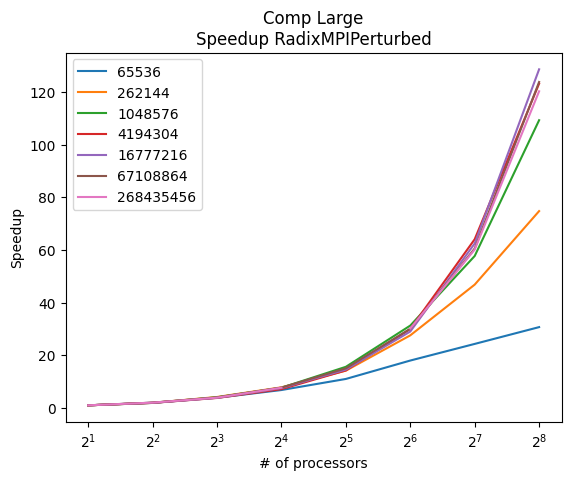

In [416]:
for key in algosMain.keys():
    plot_strong_scaling_speedup(key, algosMain[key], values, 'Avg time/rank', 'Main\nSpeedup ' + key, '# of processors', 'Speedup')
    
for key in algosComm.keys():
    plot_strong_scaling_speedup(key, algosComm[key], values, 'Avg time/rank', 'Comm\nSpeedup ' + key, '# of processors', 'Speedup')
    
for key in algosComp.keys():
    plot_strong_scaling_speedup(key, algosComp[key], values, 'Avg time/rank', 'Comp Large\nSpeedup ' + key, '# of processors', 'Speedup')

CUDA

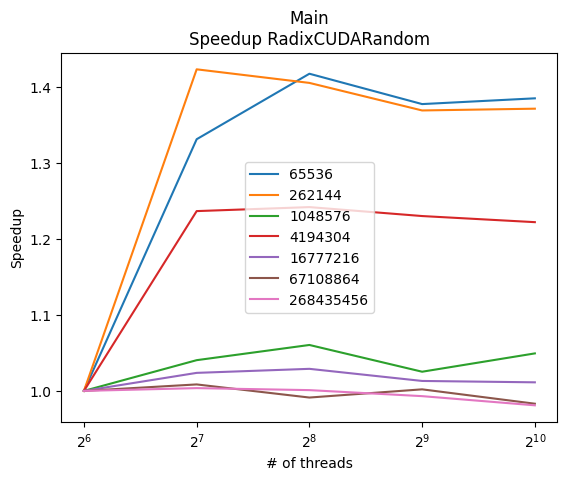

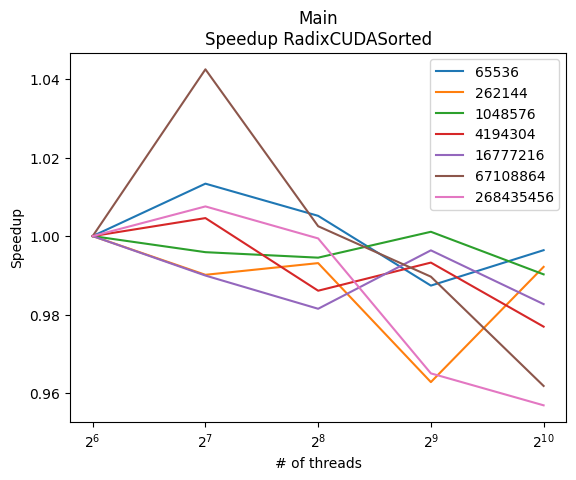

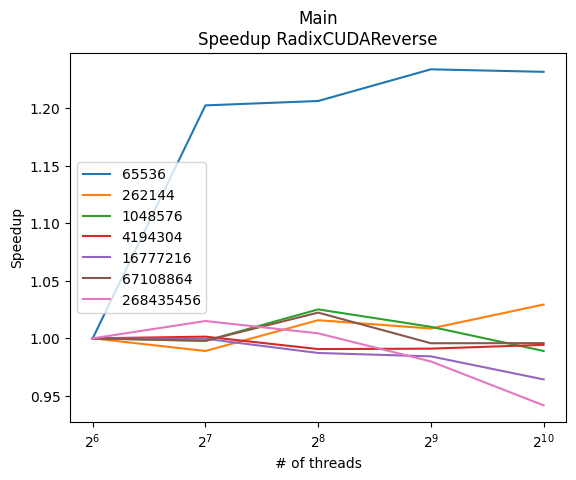

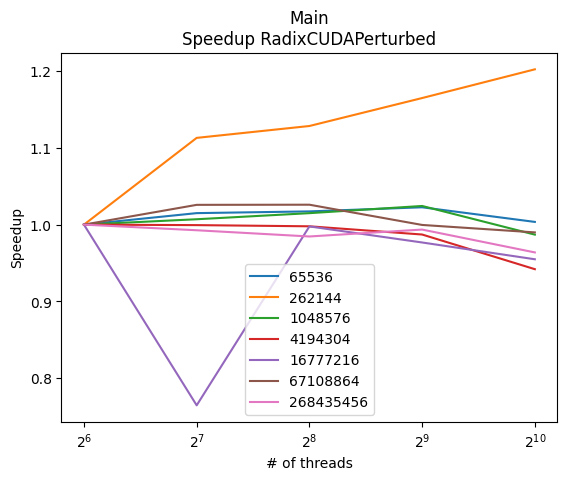

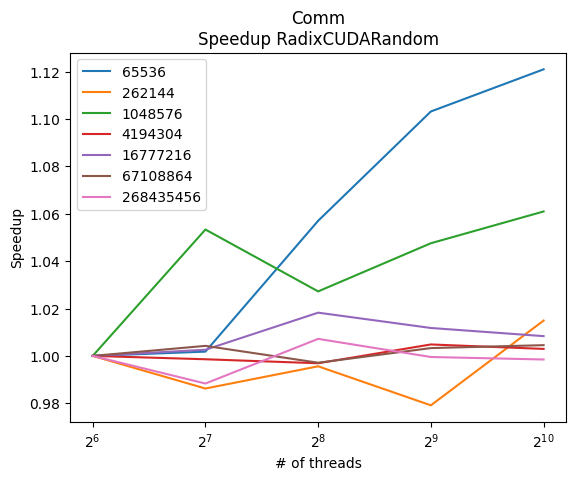

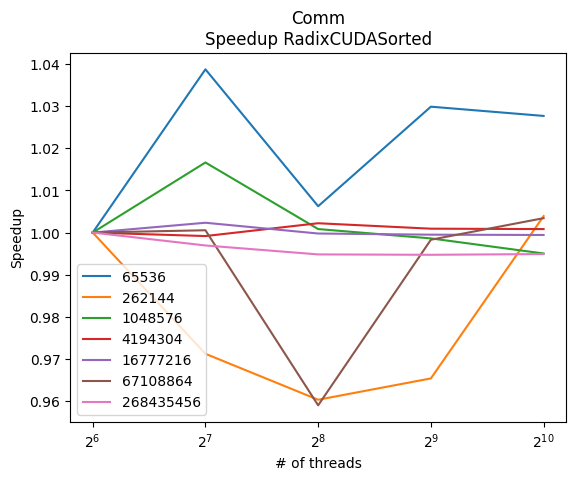

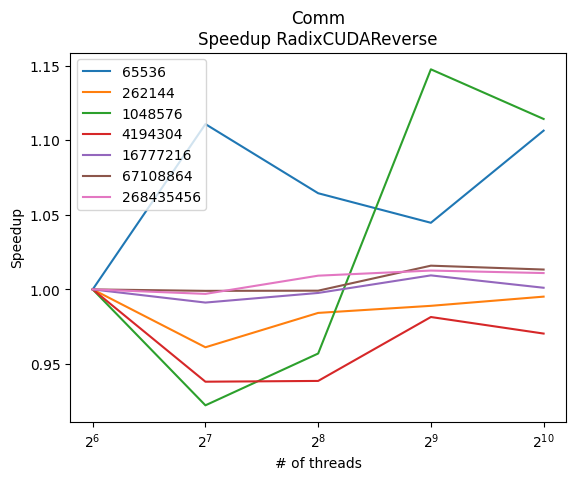

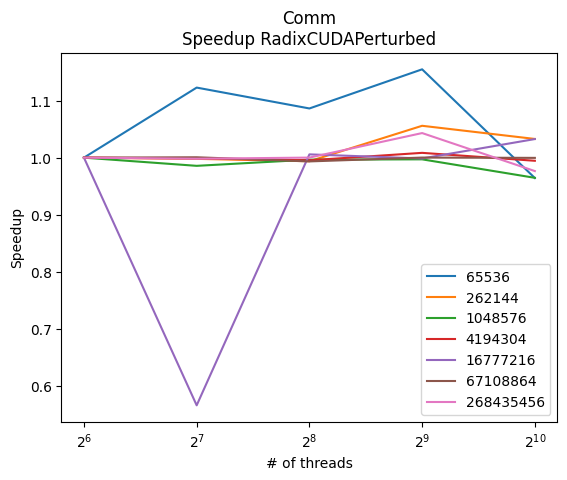

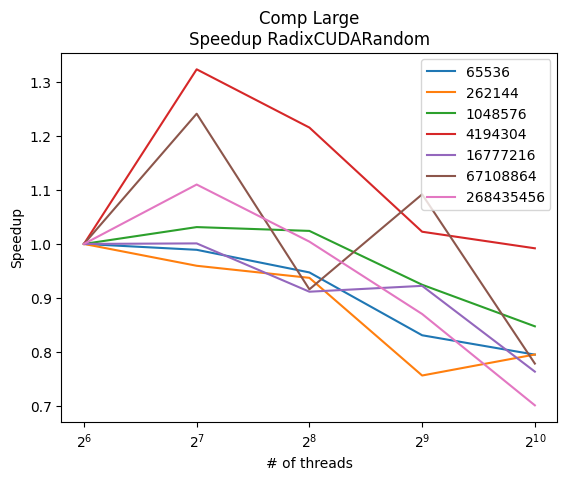

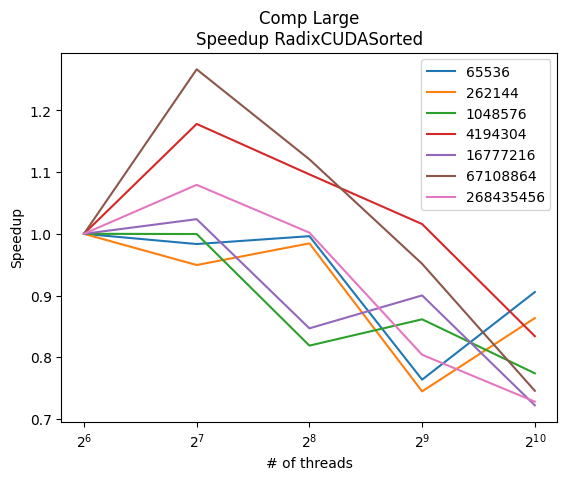

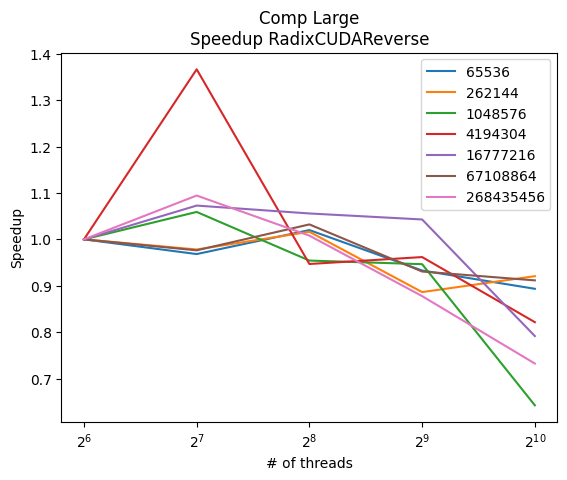

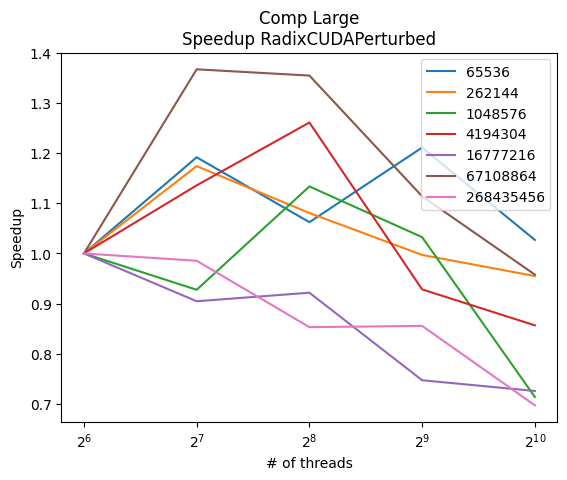

In [417]:
for key in algosMainCUDA.keys():
    plot_strong_scaling_speedup(key, algosMainCUDA[key], values, 'Avg time/rank', 'Main\nSpeedup ' + key, '# of threads', 'Speedup')
    
for key in algosCommCUDA.keys():
    plot_strong_scaling_speedup(key, algosCommCUDA[key], values, 'Avg time/rank', 'Comm\nSpeedup ' + key, '# of threads', 'Speedup')
    
for key in algosCompCUDA.keys():
    plot_strong_scaling_speedup(key, algosCompCUDA[key], values, 'Avg time/rank', 'Comp Large\nSpeedup ' + key, '# of threads', 'Speedup')

Plot weak scaling

In [418]:
def plot_weak_scaling(algoname, algo, values, time_type, title, xlabel, ylabel, savedir=None):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    xvals = [2, 8, 32, 128, 512]
    sizePerXVal = [2**20, 2**22, 2**24, 2**26, 2**28]
    yvals = []
    for idx, val in enumerate(sizePerXVal):
        correctNumProcs = algo.loc[algo['num_procs'] == xvals[idx]]
        times = correctNumProcs[val][time_type]
        yvals.append(float(times.iloc[0]))
    
    ax.plot(xvals, yvals, label = algoname)
    
    ax.legend()
    plt.xscale("log", base=2)
    plt.show()
    if savedir != None:
        plt.save(savedir)

def plot_weak_scaling_CUDA(algoname, algo, values, time_type, title, xlabel, ylabel, savedir=None):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    xvals = [64, 512, 1024]
    sizePerXVal = [2**24, 2**26, 2**28]
    yvals = []
    for idx, val in enumerate(sizePerXVal):
        correctNumProcs = algo.loc[algo['num_procs'] == xvals[idx]]
        times = correctNumProcs[val][time_type]
        yvals.append(float(times.iloc[0]))
    
    ax.plot(xvals, yvals, label = algoname)
    
    ax.legend()
    plt.xscale("log", base=2)
    plt.show()
    if savedir != None:
        plt.save(savedir)

MPI

IndexError: single positional indexer is out-of-bounds

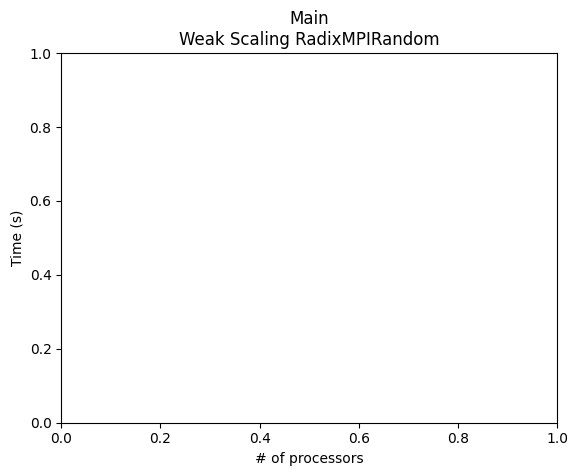

In [419]:
for key in algosMain.keys():
    plot_weak_scaling(key, algosMain[key], values, 'Avg time/rank', 'Main\nWeak Scaling ' + key, '# of processors', 'Time (s)')

for key in algosComm.keys():
    plot_weak_scaling(key, algosComm[key], values, 'Avg time/rank', 'Comm\nWeak Scaling ' + key, '# of processors', 'Time (s)')

for key in algosComp.keys():
    plot_weak_scaling(key, algosComp[key], values, 'Avg time/rank', 'Comp Large\nWeak Scaling ' + key, '# of processors', 'Time (s)')

CUDA

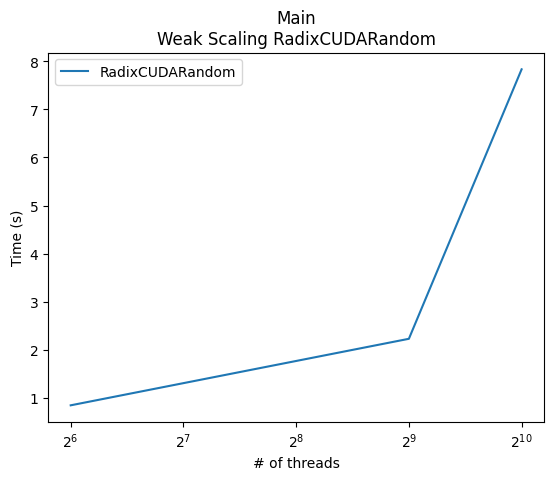

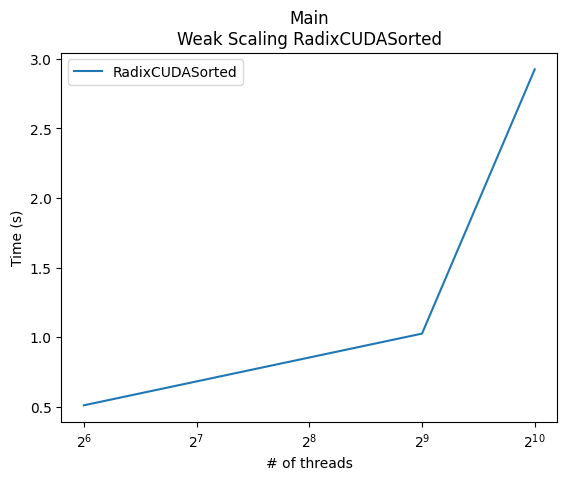

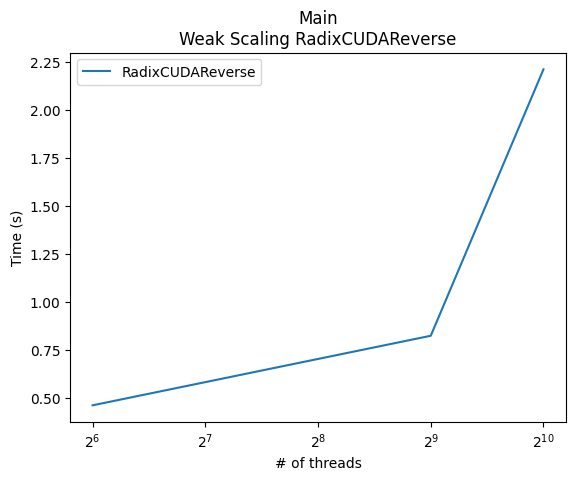

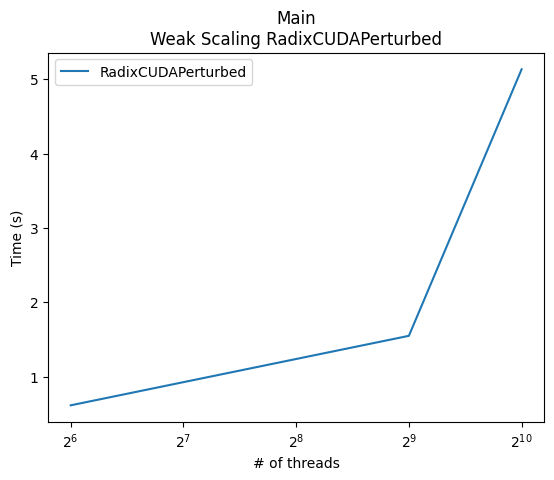

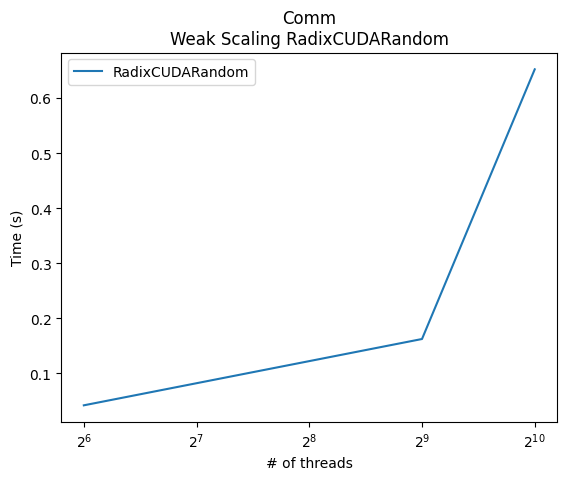

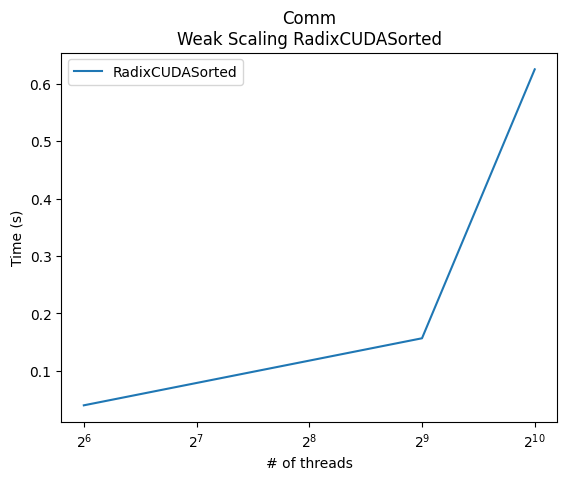

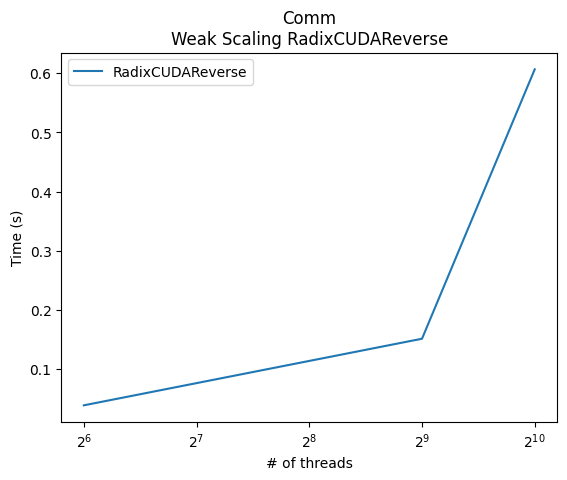

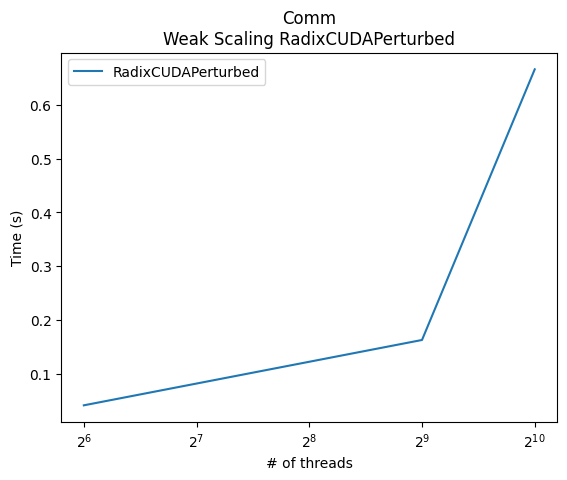

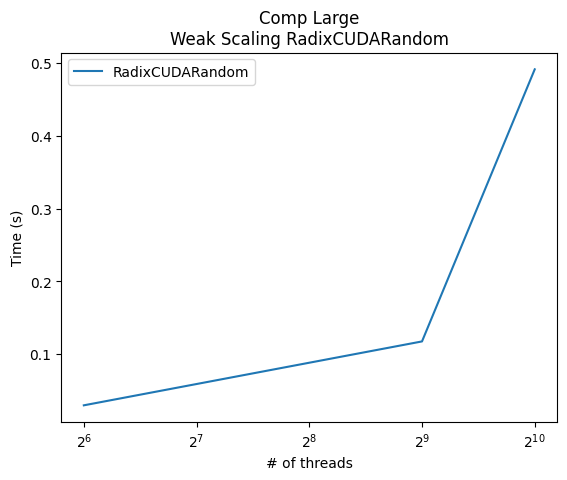

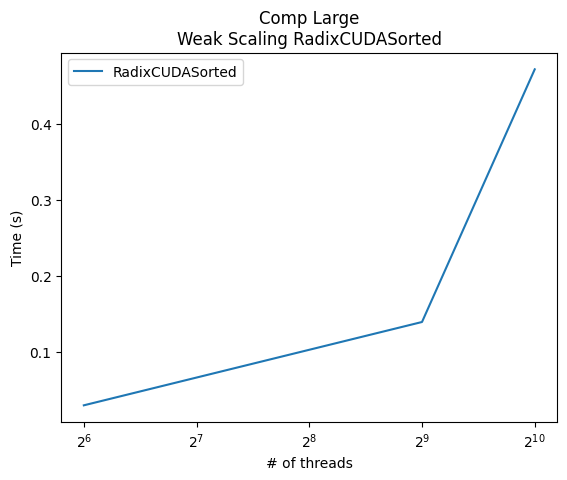

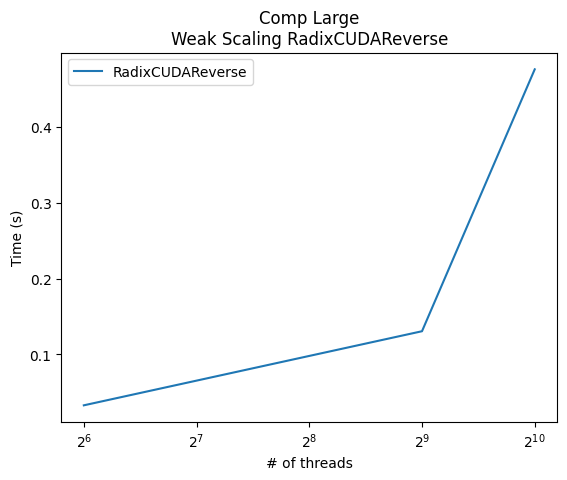

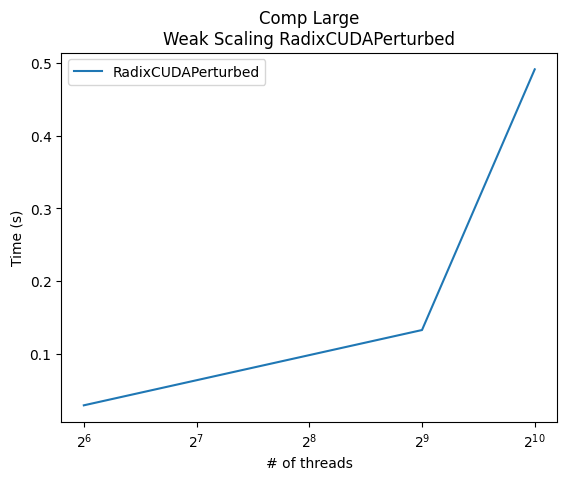

In [ ]:
for key in algosMainCUDA.keys():
    plot_weak_scaling_CUDA(key, algosMainCUDA[key], values, 'Avg time/rank', 'Main\nWeak Scaling ' + key, '# of threads', 'Time (s)')

for key in algosCommCUDA.keys():
    plot_weak_scaling_CUDA(key, algosCommCUDA[key], values, 'Avg time/rank', 'Comm\nWeak Scaling ' + key, '# of threads', 'Time (s)')

for key in algosCompCUDA.keys():
    plot_weak_scaling_CUDA(key, algosCompCUDA[key], values, 'Avg time/rank', 'Comp Large\nWeak Scaling ' + key, '# of threads', 'Time (s)')